# Day 5


So today we will be discussing confidence intervals and hypothesis testing.
This will be primarily demonstration.

In [1]:
import pandas as pd
import numpy as np
import math #Sqrts and other functions
import scipy.stats as st # stats
import seaborn as sns #figures

from numpy import random
random.seed(1329) #Ensures replicability

### Hypothesis Testing Intuition

Let us suppose I drew a card from a standard 52 card deck, and got the $A♠$.

Would you believe me?

What if I said I shuffled it again and got the $A♠$ again?

How many times, maximum, would you belive me?

The first time, the probability of $P(A♠) = \frac{1}{52}$

The second time $P(A♠,A♠) = \frac{1}{52}^2$

The third time $P(A♠,A♠,A♠) = \frac{1}{52}^3$

In [2]:
print('The class\'s critical p-value is somewhere around:', (1/52)**1, "and ", (1/52)**3)

The class's critical p-value is somewhere around: 0.019230769230769232 and  7.11197086936732e-06


Typically, if the probability of an event is <10% we believe something is off.

Some people use 5% or 1%, but the this level is called a p-value.

The terms are as follows:

    H0: I have gotten A♠ each time.
    HA: I have not gotten A♠ each time.

Critical value - the level of improbability that needs to be passed before you begin disbeliving me. In our case, it was very small, but decks of cards are blunt instruments.

## Single Point Comparisions

So let's begin by imagining that we have a single point 10. Our opponents believe that this 10 was drawn from a normal distribution with mean 4 and sd 5.

    H0: The 10 was drawn from a distribution with mean 4 and sd 10.
    HA: The 10 was not drawn from that distribution.

*Note the opponent is always H0, what everyone else believes, the default belief. Researchers are always fighting the norm, there is no research to validate existing beliefs.*

That gives:

$z = \frac{10-H_0}{\sigma}$

$z = \frac{10-4}{5}$

$z= 1.2$

That means in a *standard normal distribution* like the one shown below:

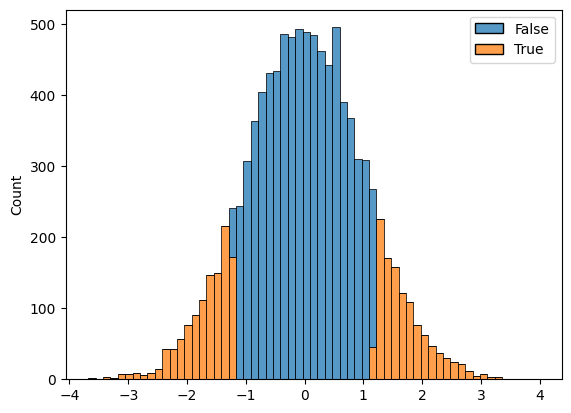

In [3]:
stdNormData = random.normal(0, 1, 10000)
outside = (stdNormData >= 1.2) | (stdNormData <= -1.2)  #Uses OR operator, the pipe.  Needs parentheses around both sides.
stdNorm = sns.histplot(x = stdNormData, hue= outside, multiple="stack") #You should explain what the stacked does.

In [4]:
print("pct of time result could be expected to be further away from H0 than 10:", sum(outside)/len(stdNormData) * 100)

pct of time result could be expected to be further away from H0 than 10: 23.200000000000003


In [5]:
print("If we set N to infinity, this probability will be: ", 2*st.norm.cdf(-1.2))
#Why did I use 2? -1.2?  Explain here, in your notes, now.

If we set N to infinity, this probability will be:  0.23013934044341644


So if this was a deck of cards, who would be we believe?

    H0: The 10 was drawn from a distribution with mean 4 and sd 10.
    HA: The 10 was not drawn from that distribution.

Most of you think it is totally possible/probable that H0 is right.

If we believe H0, we say we "fail to reject the null."

If we disbelieve H0, we say we "reject the null."

Typically, if the probability of an event is <10% we reject the null.

Some people use 5% or 1%, but the this level is called a p-value.

## Unknown Mean, Known Variance.

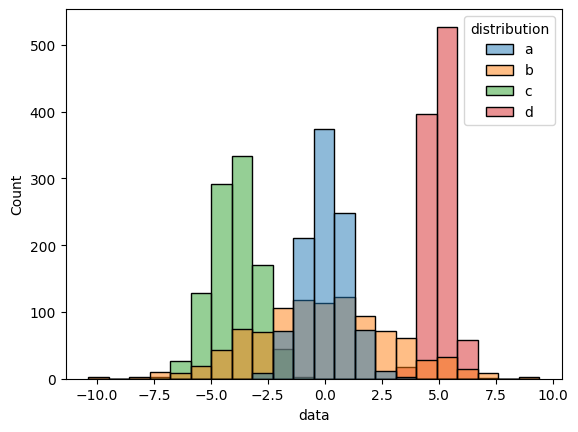

In [6]:
normalData = pd.DataFrame(index=range(0,4000), columns=['data','distribution'])
normalData = normalData.fillna(0)

normalData.loc[0:999,'data']     = random.normal(0, 1, 1000)  #think about what the .loc argument does.
normalData.loc[1000:1999,'data'] = random.normal(0, 3, 1000) #mean = 0, sd = 3, number of draws.
normalData.loc[2000:2999,'data'] = random.normal(-4, 1, 1000)
normalData.loc[3000:3999,'data'] = random.normal(5, 0.5, 1000)

normalData.loc[0:999,'distribution']     = 'a'
normalData.loc[1000:1999,'distribution'] = 'b'
normalData.loc[2000:2999,'distribution'] = 'c'
normalData.loc[3000:3999,'distribution'] = 'd'

normalHist = sns.histplot(x = normalData['data'], hue = normalData['distribution'])

Now, it is clear from last week that we have 4 different distributions here.   How can we PROVE one is substantively different than 0?

Assume your opponent is obstinant and visual inspection is insufficient.

Assume, for the moment, we are not allowed to peek at any information.

Let's start with Data Set A (you will do your own afterwards!)

    H0: Distribution A has a mean 0.
    HA: Distribution A does not have a mean 0.

Now that we don't know $\sigma$, we have to estimate. Here are our estimates:

In [7]:
#This is called SUBSETTING. Refer to Ch1 activities.
meanD =  normalData.loc[normalData['distribution'] == 'a','data'].mean()
sdD =  normalData.loc[normalData['distribution'] == 'a','data'].std()
print("Data set A has a sample mean of:", meanD, "and SD of: ", sdD)

Data set A has a sample mean of: 0.013682754808602482 and SD of:  0.9668115208312165


But

1.   Our estimates of $\bar{x}, s_x$ aren't as good as knowing the real $\mu, \sigma$.
2.   Our estimates depend on how much data we have. More data, less variation in our sample average. Specifically, the **standard error** (*the SD of our sample average*) follows $\frac{s}{\sqrt{N}}$

So we can slap these two together, this estimate is called a t-score:

$t_{N-1} = \frac{\bar{x}-H_0}{Std. Error}$

Notice how the above has the same essential shape as the z-score, then we substitute our estimate of the standard error of $\bar{x}$

$t_{N-1} = \frac{\bar{x}-H_0}{\frac{s}{\sqrt{N}}}$


For those who are astute, you might notice that $H_0$ is the only item that cannot change if we re-drew data.

$t_{N-1} \approx \frac{-0.013682 - 0}{\frac{0.9668}{\sqrt{1000}}}$

$t_{N-1} \approx \frac{-0.013682}{0.03057}$

$t_{N-1} \approx -0.44756$

You might think to yourself... but why do we need that sqrt? What if we just... didn't?

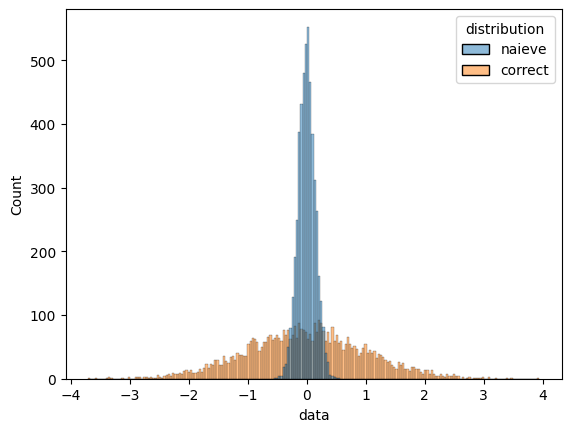

In [8]:
numberOfTests = 10000
numberOfSamplesInTest = 50  #smaller than before but test is very slow if we do 1k.
naieveTest_t = pd.DataFrame(index=range(0,numberOfTests), columns=['data','distribution'])
for i in range(0, numberOfTests//2): #// is integer division to makes sure there's no rounding errors around.
  sample = random.normal(0, 1, numberOfSamplesInTest)
  naieveTest_t.loc[i] = sample.mean()/sample.std() #std of a single point
  naieveTest_t.loc[i+numberOfTests//2] = sample.mean()/(sample.std()/math.sqrt(numberOfSamplesInTest)) #Standard deviation of sample average.

naieveTest_t.loc[(naieveTest_t.index >= numberOfTests/2),'distribution'] = 'correct'
naieveTest_t.loc[(naieveTest_t.index < numberOfTests/2),'distribution'] = 'naieve'

naieveTestPlot = sns.histplot(x = naieveTest_t['data'], hue = naieveTest_t['distribution'])

Oh my... the t-tests are VERY underpowered if we forget to divide by N!

The naieve estimate imagines the sample average could hop around as much as a single point does. The sample average tends to be pretty conistent over time (relative to one point), so this means the sample average hardly every ticks anything interesting happening in the t-score.  The naieve t-score then is pretty much always the same.

The improved standard errors recognize that the sample mean will move very little if sample sizes are big.  So if a sample mean gets a big number, then it better reflects that difference.


But what does this t test look like?  We actually have to feed it 2 pieces of information, the t-value, and the **degrees of freedom**.

In [9]:
2*st.t.cdf(-0.44756, (1000-1)) #This is that N-1 subscript, remember why we are doing 2x

0.6545678048992367

So about 48% of the time we would expect to see a result further away from 0 than our observed result.

This means we are not ready to reject the null under our p-value of 0.05%

    H0: Distribution A has a mean 0.
    HA: Distribution A does not have a mean 0.

We cannot disagree with the idea that distribution A has a mean 0.

## Comparing the Means Of Distributions

The previous things checked if things were equal to a specific number. What if we have a distribution and we want to see if it's equal to another distribution (at least in terms of means?)

In which case, we need to exploit the fact that variances add.

The structure of our test will remain the same:

$t_{?} \approx \frac{\bar{x}-\bar{y}}{Measure Of Distance} = \frac{\bar{x}-\bar{y}}{\sqrt{SE^2_x + SE^2_y}} = \frac{\bar{x}-\bar{y}}{\sqrt{\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}}}$

The degrees of freedom for this, marked as $?$, [is not immediately intuitive, however](https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm).

$\frac{ \frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}}{\frac{(\frac{s_x^2}{n_x})^2}{n_x-1} + \frac{(\frac{s_y^2}{n_y})^2}{n_y-1}}$

But instead of that, [you can typically can just use the smaller of](http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm) $n_x-1$ or $n_y-1$.

## Calculating Confidence Intervals

We've actually went through the heart of calculated CI's earlier.  Let's refresh on what we did (with a minor change of 1.96 instead of 1.2)

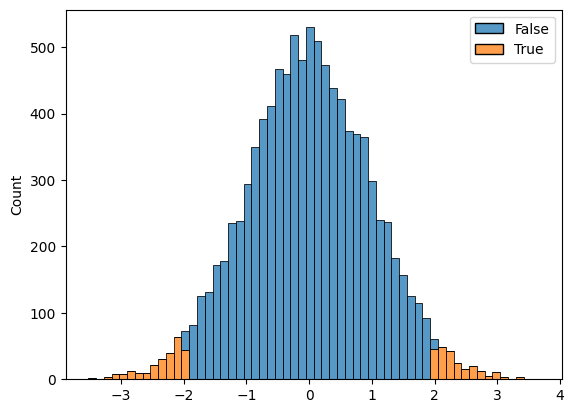

In [10]:
stdNormData = random.normal(0, 1, 10000)
outside = (stdNormData >= 1.96) | (stdNormData <= -1.96)  #Uses OR operator, the pipe.  Needs parentheses around both sides.
stdNorm = sns.histplot(x = stdNormData, hue= outside, multiple="stack") #You should explain what the stacked does.

In [11]:
print("pct of time result could be expected to be further away from H0 than 10:", sum(outside)/len(stdNormData) * 100)

pct of time result could be expected to be further away from H0 than 10: 4.93


In [12]:
print("If we set N to infinity, this probability will be: ", 2*st.norm.cdf(-1.96))


If we set N to infinity, this probability will be:  0.04999579029644087


So the there is some z-value $(\pm 1.96)$ that demarkates 95% of the data being inside of it. If I have a data point that tends to vary, I'd like to have the same confidence that my data will fall within a particular interval, thus, a CI.

We know from above demonstration that 5% of the data tends to fall OUTSIDE

#Exercizes:

Complete 3 of the 5 exercizes.

1) Show me your additional notes in the code above you made as we went through it. Should be **BOLDED**, so I know it's new.

2) Tim claims he flipped 7 heads in a row on a fair coin. Do you believe him? Why? What p-value will you use to make your determination? What's your H0 and HA?

3,4,5) Perform a t-test for data sets B, C and D.  Confirm if B is significantly different than 0, C is significantly different than -1, and D is significantly different than 3. Use a p-value of 5%.

6) Check if A is different than B.

+100 points - Write a function that performs a z-test when given the input: observed measure, H0, p-value, and standard deviation.

# Clever Loops


In [13]:
#Coding expansion, great uses for for-loops:
for i in ['a','b','c','d']:
  meanI =  normalData.loc[normalData['distribution'] == i,'data'].mean()
  sdI =  normalData.loc[normalData['distribution'] == i,'data'].std()
  print("Data set ", i, " has a sample mean of:", meanI, "and SD of: ", sdI)

Data set  a  has a sample mean of: 0.013682754808602482 and SD of:  0.9668115208312165
Data set  b  has a sample mean of: -0.07089408134652452 and SD of:  2.984032995722191
Data set  c  has a sample mean of: -3.9693591366642025 and SD of:  0.9895824432482856
Data set  d  has a sample mean of: 5.0252705584617905 and SD of:  0.4890107513872707
